# EDA on Penguins

In this notebook exercise, we will conduct simple EDA steps on the popular penguins dataset.

### Load the dataset

Dataset source: https://github.com/allisonhorst/palmerpenguins

In [115]:
import seaborn as sns
import pandas as pd

In [116]:
df = sns.load_dataset('penguins')

In [117]:
df.shape

(344, 7)

# Step 1 Understand the Features

You can find information about this dataset here: https://www.kaggle.com/code/parulpandey/penguin-dataset-the-new-iris

**Question: in your own words**:
1. describe each feature
2. mention its type (numeric or categorical)
3. write its name in Arabic

Note: use a Markdown cell.

In [153]:
# Species
# Description: The species of the penguin.
# Type: Categorical
# Arabic: النوع

# Island
# Description: The island in the Palmer Archipelago where the penguin was observed.
# Type: Categorical
# Arabic: الجزيرة

# Bill Length (mm)
# Description: The length of the penguin's bill, measured in millimeters.
# Type: Numeric
# Arabic: طول المنقار (مم)

# Bill Depth (mm)
# Description: The depth of the penguin's bill, measured in millimeters.
# Type: Numeric
# Arabic: عمق المنقار (مم)

# Flipper Length (mm)
# Description: The length of the penguin's flipper, measured in millimeters.
# Type: Numeric
# Arabic: طول الزعنفة (مم)

# Body Mass (g)
# Description: The mass of the penguin, measured in grams.
# Type: Numeric
# Arabic: كتلة الجسم (جم)

# Sex
# Description: The sex of the penguin (male or female).
# Type: Categorical
# Arabic: الجنس


Hint: you can attach an image to illustrate what the features are.

<img src="https://github.com/allisonhorst/palmerpenguins/raw/main/man/figures/culmen_depth.png" width="400">

# Step 2

- Have a look at the columns and their values (`head`, `sample`, `tail`)
- Look at the technical information (`info`)

In [119]:
df.sample()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN


In [120]:
df.tail()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female
343,Gentoo,Biscoe,49.9,16.1,213.0,5400.0,Male


In [121]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


# Step 3

1. For each column, check and handle missing values; state your strategy and justify it. Examples:
    - Strategy: drop the column. Justification: ...?
    - Strategy: fill missing values. Justificaiton: ...?
    - Strategy: drop the row. Justification: ...?
1. Calculate count and percentage of missing values before handling them
1. Check and handle duplicated rows
1. Calculate the percentage of data loss after cleaning

In [123]:
df.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [126]:
df.dropna(inplace=True)

In [127]:
df.isna().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

# Step 4

#### Data types conversion
- We shall convert the string types to `category` to preserve memory
- numeric types can be stored in less precision: `float32`

In [128]:
mem_usage_before = df.memory_usage(deep=True)

In [129]:
# convert categotical types
df['species'] = df['species'].astype('category')
df['island'] = df['island'].astype('category')
df['sex'] = df['sex'].astype('category')


In [130]:
# convert numerical types
df['bill_depth_mm'] = df['bill_depth_mm'].astype('float32')
df['bill_length_mm'] = df['bill_length_mm'].astype('float32')
df['flipper_length_mm'] = df['flipper_length_mm'].astype('float32')
df['body_mass_g'] = df['body_mass_g'].astype('float32')


Calculate memory saved after type conversion

In [131]:
mem_usage_after = df.memory_usage(deep=True)

In [132]:
print('memory saved:', (mem_usage_before - mem_usage_after).sum() // 1024, 'KB')

memory saved: 64 KB


# Step 5

#### Detect inconsistency in categorical values

The categorical columns should be checked for any inconsistencies. For example. We look for lowercase, uppercase, or inconsistent use of codes (e.g., "M", "F") with non-codes (e.g., "Male", "Female")  in the `sex` column.

- hint: use `.unique()` to check the number of unique values in a column
- you can also use: `.value_counts()` to check the frequency of each value in a column

In [133]:
df['sex'].unique()

['Male', 'Female']
Categories (2, object): ['Female', 'Male']

In [134]:
df.value_counts()

species  island     bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  sex   
Adelie   Biscoe     34.500000       18.100000      187.0              2900.0       Female    1
Gentoo   Biscoe     44.000000       13.600000      208.0              4350.0       Female    1
                    43.599998       13.900000      217.0              4900.0       Female    1
                    43.500000       15.200000      213.0              4650.0       Female    1
                                    14.200000      220.0              4700.0       Female    1
                                                                                            ..
Adelie   Torgersen  36.599998       17.799999      185.0              3700.0       Female    1
                    36.200001       17.200001      187.0              3150.0       Female    1
                                    16.100000      187.0              3550.0       Female    1
                    35.900002       16.600000      190.

# Step 6: Univariate Analysis

- Separate numerical from categorical columns (hint; use `df.select_dtypes()`)
- Look at the statistical information for each:
    - `df_num.describe().T`
    - `df_cat.describe().T`

In [135]:
df_num = df.select_dtypes(include = 'float32')
print(df_num.describe().T)

                   count         mean         std          min     25%  \
bill_length_mm     333.0    43.992794    5.468668    32.099998    39.5   
bill_depth_mm      333.0    17.164865    1.969235    13.100000    15.6   
flipper_length_mm  333.0   200.966965   14.015767   172.000000   190.0   
body_mass_g        333.0  4207.057129  805.215820  2700.000000  3550.0   

                           50%          75%          max  
bill_length_mm       44.500000    48.599998    59.599998  
bill_depth_mm        17.299999    18.700001    21.500000  
flipper_length_mm   197.000000   213.000000   231.000000  
body_mass_g        4050.000000  4775.000000  6300.000000  


In [136]:
df_cat=df.select_dtypes(include = 'category')
print(df_cat.describe().T)

        count unique     top freq
species   333      3  Adelie  146
island    333      3  Biscoe  163
sex       333      2    Male  168


Use charts to plot `value_counts()` categorical variables:
1. plot `species` using bar plot
1. plot `island` using pie chart
1. plot `sex` using horizontal bar plot

In [137]:
import matplotlib.pyplot as plt

<Axes: xlabel='species'>

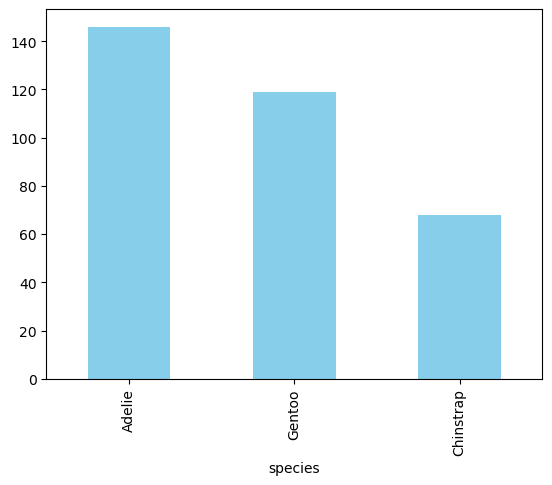

In [138]:
species_counts = df['species'].value_counts()
species_counts.plot(kind='bar', color='skyblue')

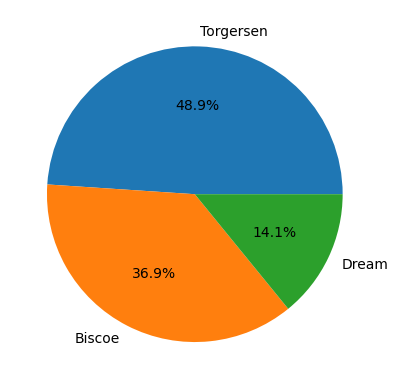

In [139]:
plt.pie(df['island'].value_counts(),autopct='%1.1f%%', labels=df_cat['island'].unique())
plt.show()

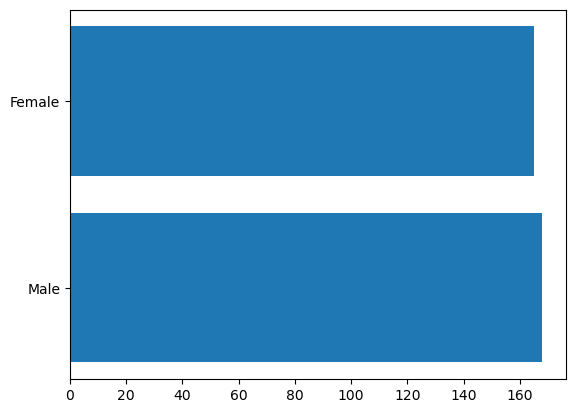

In [140]:
plt.barh(df_cat['sex'].value_counts().index,df_cat['sex'].value_counts())
plt.show()

Plot numerical variables:

1. Boxplot: `bill_length_mm`
1. Histogram: `bill_depth_mm`
1. Boxplot: `flipper_length_mm`
1. Histogram: `body_mass_g`

<Axes: >

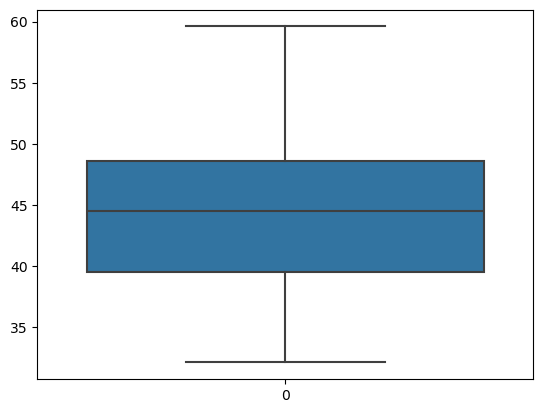

In [141]:
sns.boxplot(df['bill_length_mm'])

C:\Users\CovidVaccine-13\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='bill_depth_mm', ylabel='Count'>

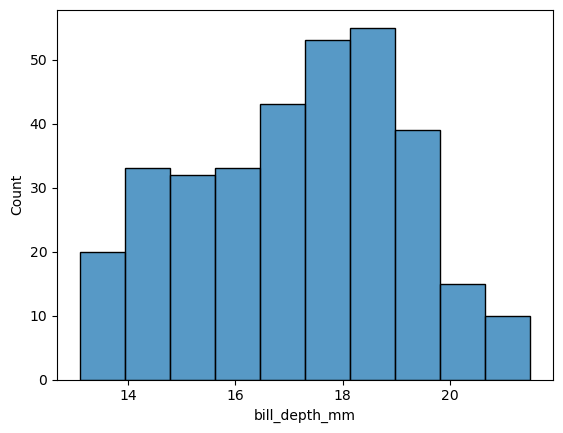

In [142]:
sns.histplot(df['bill_depth_mm'])

<Axes: >

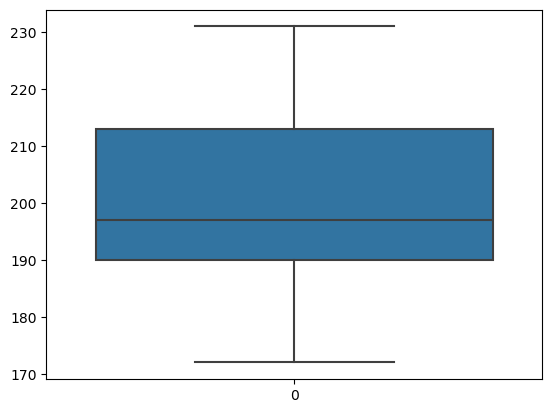

In [143]:
sns.boxplot(df['flipper_length_mm'])

C:\Users\CovidVaccine-13\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='body_mass_g', ylabel='Count'>

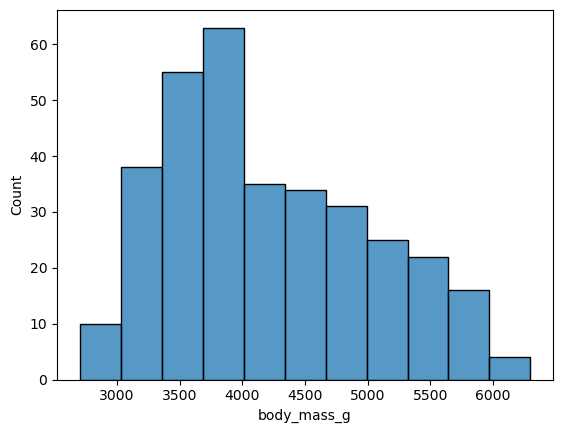

In [144]:
sns.histplot(df['body_mass_g'])

## Step 7: Bivariate Analysis

#### Correlation between numerical features

Let's find out if there is any correlation between numerical features.

- Hint: you can use the `df.corr()` to find the correlation matrix.
- Hint: you can use `sns.heatmap()` to plot the correlation matrix

In [145]:
correlation_matrix = df_num.corr()
correlation_matrix

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.228626,0.653096,0.589451
bill_depth_mm,-0.228626,1.000000,-0.577792,-0.472016
flipper_length_mm,0.653096,-0.577792,1.000000,0.872979
body_mass_g,0.589451,-0.472016,0.872979,1.000000


Write down your observations based on the correlation heatmap.

Observations:

<Axes: >

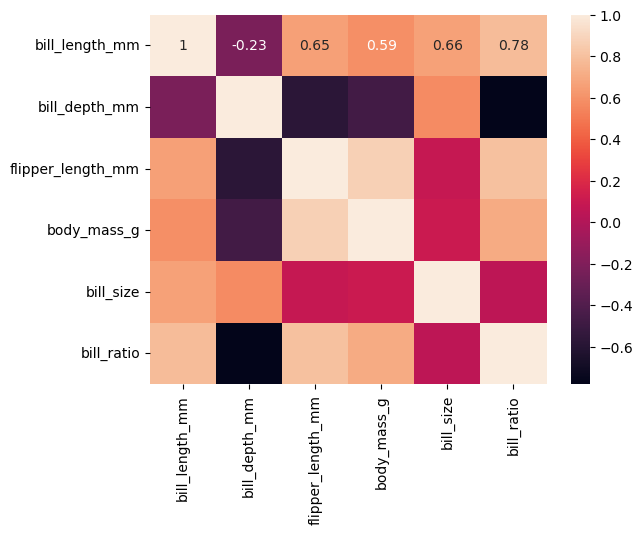

In [154]:
sns.heatmap(correlation_matrix,annot = True )

### Feature Engineering

- We might try adding the feature `bill_size` which is the product of `bill_length` and `bill_depth` to see if it has any significance in the model.
- We might also try `bill_ratio` which is the ratio of `bill_length` to `bill_depth` to see if it has any significance in the model.

In [147]:
df['bill_size']= df['bill_length_mm'] * df['bill_depth_mm']
df['bill_ratio']= df['bill_length_mm'] / df['bill_depth_mm']
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,bill_size,bill_ratio
0,Adelie,Torgersen,39.099998,18.700001,181.0,3750.0,Male,731.169983,2.090909
1,Adelie,Torgersen,39.500000,17.400000,186.0,3800.0,Female,687.299988,2.270115
2,Adelie,Torgersen,40.299999,18.000000,195.0,3250.0,Female,725.399963,2.238889
4,Adelie,Torgersen,36.700001,19.299999,193.0,3450.0,Female,708.309998,1.901554
5,Adelie,Torgersen,39.299999,20.600000,190.0,3650.0,Male,809.580017,1.907767


Let's look at the correlation to see whether the newly created features are better.

In [151]:
# This plots the correlation values for a specific column
# which is usually what we are interested in

# corr['body_mass_g'].sort_values().plot.barh()

In [149]:
df_num = df.select_dtypes(include='number')
correlation_matrix = df_num.corr()
correlation_matrix

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,bill_size,bill_ratio
bill_length_mm,1.000000,-0.228626,0.653096,0.589451,0.661467,0.779230
bill_depth_mm,-0.228626,1.000000,-0.577792,-0.472016,0.575513,-0.781246
flipper_length_mm,0.653096,-0.577792,1.000000,0.872979,0.086512,0.801980
body_mass_g,0.589451,-0.472016,0.872979,1.000000,0.104220,0.702179
bill_size,0.661467,0.575513,0.086512,0.104220,1.000000,0.048658
bill_ratio,0.779230,-0.781246,0.801980,0.702179,0.048658,1.000000


<Axes: >

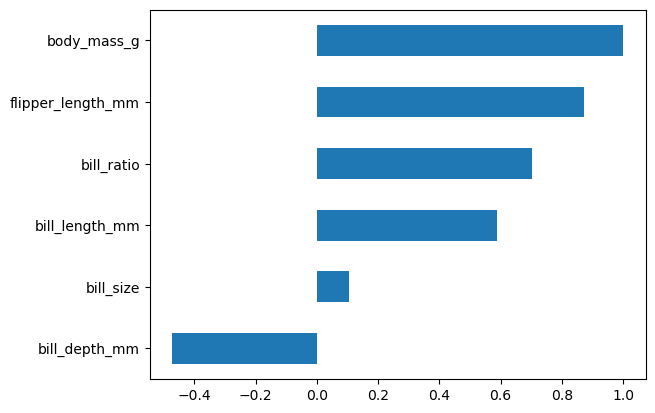

In [150]:
correlation_matrix['body_mass_g'].sort_values().plot.barh()